In [42]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)
import matplotlib.pyplot as plt

2.0.0


In [25]:
imdb,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [26]:
train,test=imdb['train'],imdb['test']

In [27]:
training_sentences=[]
train_labels=[]
test_sentences=[]
test_labels=[]

In [28]:
for s,l in train:
    training_sentences.append(str(s.numpy()))
    train_labels.append(l.numpy())
for s,l in test:
    test_sentences.append(str(s.numpy()))
    test_labels.append(l.numpy())
print(len(training_sentences),len(train_labels))
print(len(test_sentences),len(test_labels))

25000 25000
25000 25000


In [29]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [30]:
vocab_size=10000
max_length=120
embedding_dim=16
oov_token='<OOV>'
trunc_type='post'
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
train_sequences=tokenizer.texts_to_sequences(training_sentences)
train_padded=pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type)
test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type)

In [31]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
z1=model.fit(train_padded,train_labels,epochs=10,validation_data=(test_padded,test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 9s 369us/sample - loss: 0.5209 - accuracy: 0.7344 - val_loss: 0.3990 - val_accuracy: 0.8150
Epoch 2/10
25000/25000 [==============================] - 7s 267us/sample - loss: 0.3043 - accuracy: 0.8724 - val_loss: 0.3799 - val_accuracy: 0.8301
Epoch 3/10
25000/25000 [==============================] - 6s 233us/sample - loss: 0.2282 - accuracy: 0.9106 - val_loss: 0.4431 - val_accuracy: 0.8082
Epoch 4/10
25000/25000 [==============================] - 7s 275us/sample - loss: 0.1522 - accuracy: 0.9456 - val_loss: 0.4578 - val_accuracy: 0.8178
Epoch 5/10
25000/25000 [==============================] - 6s 222us/sample - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.5534 - val_accuracy: 0.8020
Epoch 6/10
25000/25000 [==============================] - 6s 231us/sample - loss: 0.0380 - accuracy: 0.9901 - val_loss: 0.6790 - val_accuracy: 0.7895
Epoch 7/10
25000/25000 [==========================

In [35]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
z2=model.fit(train_padded,train_labels,epochs=10,validation_data=(test_padded,test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 8s 319us/sample - loss: 0.5835 - accuracy: 0.7504 - val_loss: 0.4571 - val_accuracy: 0.8074
Epoch 2/10
25000/25000 [==============================] - 5s 213us/sample - loss: 0.3750 - accuracy: 0.8432 - val_loss: 0.3864 - val_accuracy: 0.8262
Epoch 3/10
25000/25000 [==============================] - 7s 261us/sample - loss: 0.3145 - accuracy: 0.8675 - val_loss: 0.3702 - val_accuracy: 0.8362
Epoch 4/10
25000/25000 [==============================] - 7s 272us/sample - loss: 0.2871 - accuracy: 0.8795 - val_loss: 0.3679 - val_accuracy: 0.8380
Epoch 5/10
25000/25000 [==============================] - 7s 265us/sample - loss: 0.2705 - accuracy: 0.8883 - val_loss: 0.3880 - val_accuracy: 0.8298
Epoch 6/10
25000/25000 [==============================] - 7s 273us/sample - loss: 0.2582 - accuracy: 0.8948 - val_loss: 0.3830 - val_accuracy: 0.8350
Epoch 7/10
25000/25000 [==========================

Text(0.5, 1.0, 'Using Flatten')

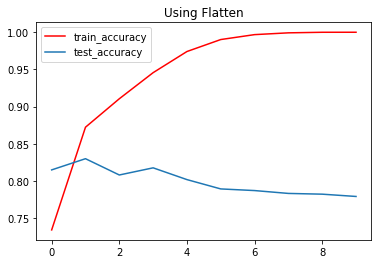

In [51]:
plt.plot(z1.history['accuracy'],'r',label='train_accuracy')
plt.plot(z1.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.title("Using Flatten")

Text(0.5, 1.0, 'Using Global Average')

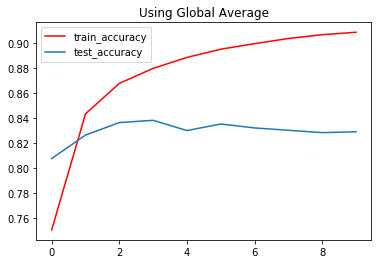

In [52]:
plt.plot(z2.history['accuracy'],'r',label='train_accuracy')
plt.plot(z2.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.title("Using Global Average")

In [58]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights.shape) #shape (vocab_size,embeddings)

(10000, 16)


In [62]:
reversed_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [64]:
import io

In [67]:
out_v=io.open('vecs.tsv',mode='w',encoding='utf-8')
out_m=io.open('meta.tsv',mode='w',encoding='utf-8')
for i in range(1,vocab_size):
    word=reversed_word_index[i]
    embeddings=weights[i]
    out_v.write('/t'.join([str(x) for x in embeddings])+'/n')
    out_m.write(word+'\n')
out_v.close()
out_m.close()